For week two of the project I decided to investigate the possible evolution paths that the novel coronavirus could take in its future phylogenetic trees. I attempted to do so by comparing the phylogenetic tree generated in the description of Project 2 to what phylogenetic trees of other international viruses which have existed and been studied in larger timeframes. Specifically, I compared it to HIV-1 and the influenza strains phylogenetic trees. I chose these two viruses as they are both RNA viruses similar to COVID-19, but HIV-1 uses a different, more error-prone transcription method to use as a more stark contrast in how quickly the viruses can change. While HIV-1 could be considered an invalid comparison due to its different replication method, the research I found on mutation rates among viruses found its mutation rate to be higher but still within range of other RNA viruses.

Here is the phylogenetic tree generated from the COVID-19 Galaxy Project's genome collection found here: https://covid19.galaxyproject.org/genomics/4-Variation/current_complete_ncov_genomes.fasta

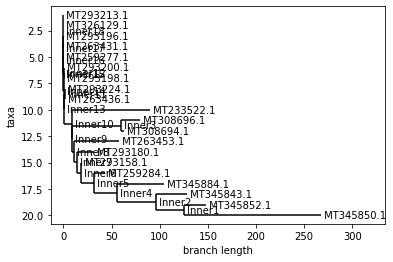

In [1]:
import pandas as pd
import numpy as np
from Bio.Phylo.TreeConstruction import DistanceMatrix
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import Phylo

position_table = pd.read_csv('position_table.csv')
results = position_table.describe()

#Taking consensus sequence
concensus_seq = position_table.drop('seqid',axis=1).mode(axis=0).T[0]
position_table = position_table.set_index('seqid')

#Determining sample distance from consensus sequence
distance_from_concensus_seq = position_table.apply(lambda row: sum(row != concensus_seq),axis=1)
distance_from_concensus_seq_sorted = distance_from_concensus_seq.sort_values(ascending=False)

#Selecting desired sequences to examine
#I included 20 sequences instead of 10 to show those whose branch length
#is low and the fact that it continues to shrink when going further up the tree
subset_seqs = distance_from_concensus_seq_sorted[:20].index
subset_seqs

#Creating distance matrix
distances = {}
for i,seqid1 in enumerate(subset_seqs):
    distances[seqid1,seqid1]=0
    for j in range(i+1,len(subset_seqs)):
        seqid2 = subset_seqs[j]
        distances[seqid1,seqid2] = sum(position_table.loc[seqid1] != position_table.loc[seqid2])
        distances[seqid2,seqid1] = distances[seqid1,seqid2]
distances = pd.Series(distances).unstack()

#Using biopython to generate tree from distance matrix
matrix = np.tril(distances.values).tolist()
for i in range(len(matrix)):
    matrix[i] = matrix[i][:i+1]
dm = DistanceMatrix(list(distances.index), matrix)

constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)

tree.ladderize()   # Flip branches so deeper clades are displayed at top
Phylo.draw(tree)


Below are the trees created by searching through the HIV sequence database found at https://www.hiv.lanl.gov/. This database not only compiles HIV genomes from countries all around the world, but includes useful visualization tools to manipulate and extract information from the genomes. I used their phylogenic tree tool to generate newick files to be parsed and displayed by biopython.

The first tree below represents 22 HIV-1 genomes collected in 1983 between laboratories in France and the United States. These were some of the first sequenced and studied when HIV became an international concern in the early 1980's. I decided to include this tree to show viral evolution over a short time period (1 year) for a closer comparison to the data we've analysed for covid-19 which has been sequenced and examined for less than one year. Furthermore, this first tree only examines a short portion of the genome as I thought this may also make comparisons more valid considering our coronavirus trees used a short portion of the genome (spike protein) for alignment. This tree shows us that in just one year of sequencing and studying the virus across the 22 genomes examined here, it had already experienced around ten major mutations making it extremely difficult to attempt to develop treatments for.

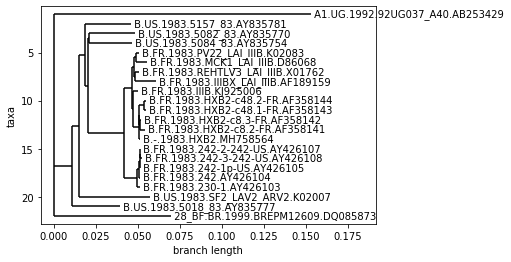

In [2]:
hiv_trees = Phylo.parse('hiv_flu.newick', 'newick')
tree_list = []
for tree in hiv_trees:
    tree_list.append(tree)
Phylo.draw(tree_list[0])

This next tree considers 47 HIV-1 genomes spanning from 1983 to 2004 and includes samples from many different countries (Myanmar, India, Thailand, Ghana, Japan) to hopefully show the stark difference in evolution of a retrovirus like HIV-1 and covid-19. The labels on this tree are not readable due to their compactness, but the hiv_flu.newick file available in my folder in the repo outlines each genome's identifier and country/date information if one wanted to read through or consider that information. This tree shows that the high mutation rate of HIV-1 continued in the following years with dozens of mutations significantly increasing genetic diversity and making it nearly impossible to develop a cure using traditional immunization approaches.

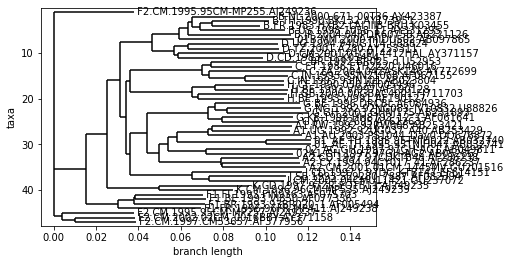

In [3]:
Phylo.draw(tree_list[1])

This final tree represents 32 influenza genomes collected across multiple countries (USA, France, China, South Korea) between the years of 2012-2018. The data was obtained and organized into newick format from https://www.fludb.org/. In this tree we see a different path than what HIV-1 took over its multi-year evolution. Rather than frequent and semi-significant mutations, the influenza virus appears to have undergone infrequent but very significant changes throughout its evolutionary history between 2012-2018. Individual mutations are usually small and keep the virus close to its siblings from common ancestors, but occasionally are very drastic and create an entirely new form of the virus. This could yield insight on why the influenza virus can have seasons which are significantly worse than others, due to a major change occuring in the virus itself.

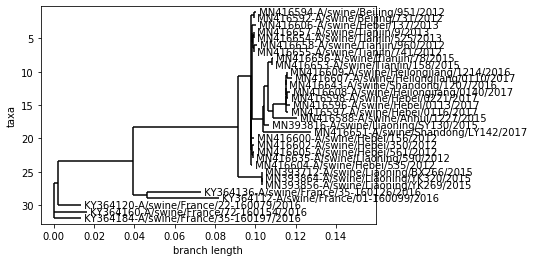

In [4]:
Phylo.draw(tree_list[2])

The amount of data that we examined from the coronavirus genomes is not as large, diverse, or temporally spread as the data that can be extracted from major databases on HIV/Influenza. With this information in mind, it is important to note that these comparisons could turn out to not be entirely accurate or valid to make. Nonetheless, when comparing the phylogenetic tree generated with the coronavirus genomes to the other three above, I would say coronavirus seems to be following influenza's path of frequent, small mutations with the occasional large jump. Our data yielded about 11 genomes that significantly differed from the rest of the samples. The remaining ~790 samples were rather close to each other in terms of phylogenetic tree branch length implying they are similar to each other.

If this is the case and COVID-19 follows the evolutionary path of influenza, could we see resurgances of the virus each year as we do with the flu? Perhaps the coronavirus will continue to mutate in significant ways that make it difficult to completely irradicate like the influenza virus. 